In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("seaborn-whitegrid")

/tmp/ipykernel_32/1759593133.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


# Train set

In [5]:
def make_df(directory):
    df = pd.read_csv(directory)
    df = pd.DataFrame(df)
    return df

In [6]:
pd.set_option('display.max_rows', 4)

train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
df_train = pd.DataFrame(train)
df_train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


MSSubClass: Identifies the type of dwelling involved in the sale.

MSZoning: Identifies the general zoning classification of the sale.

LotFrontage: Linear feet of street connected to property.

LotArea: Lot size in square feet

Street: Type of road access to property

Alley: Type of alley access to property

LotShape: General shape of property

In [7]:
nan_counts = df_train.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [8]:
df_train.shape

(1460, 81)

In [9]:
pd.set_option('display.max_rows', None)
print(df_train.dtypes)
pd.set_option('display.max_rows', 6)

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [106]:
df_train_col = df_train.drop(columns=['PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'Alley', 'LotFrontage'])
df_train_filt = df_train_col.dropna(axis=0)

nan_counts = df_train_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [107]:
df_train_filt.shape

(1338, 75)

In [142]:
X = df_train_filt.copy()
y = X["SalePrice"]
# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [144]:
X

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,0,8450,0,0,0,0,0,0,0,0,0,0,0,7,5,2003,2003,0,0,0,0,0,196.0,0,0,0,0,0,0,0,706,0,0,150,856,0,0,0,0,856,854,0,1710,1,0,2,1,3,1,0,8,0,0,0,2003.0,0,2,548,0,0,0,0,61,0,0,0,0,0,2,2008,0,0,208500
1,2,20,0,9600,0,0,0,0,1,0,1,1,0,0,1,6,8,1976,1976,0,0,1,1,1,0.0,1,0,1,0,0,1,1,978,0,0,284,1262,0,0,0,0,1262,0,0,1262,0,1,2,0,3,1,1,6,0,1,0,1976.0,0,2,460,0,0,0,298,0,0,0,0,0,0,5,2007,0,0,181500
2,3,60,0,11250,0,1,0,0,0,0,0,0,0,0,0,7,5,2001,2002,0,0,0,0,0,162.0,0,0,0,0,0,2,0,486,0,0,434,920,0,0,0,0,920,866,0,1786,1,0,2,1,3,1,0,6,0,1,0,2001.0,0,2,608,0,0,0,0,42,0,0,0,0,0,9,2008,0,0,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,0,9042,0,0,0,0,0,0,2,0,0,0,0,7,9,1941,2006,0,0,6,6,1,0.0,2,1,4,1,1,0,0,275,0,0,877,1152,0,0,0,0,1188,1152,0,2340,0,0,2,0,4,1,0,9,0,2,0,1941.0,0,1,252,0,0,0,0,60,0,0,0,0,2500,5,2010,0,0,266500
1458,1459,20,0,9717,0,0,0,0,0,0,11,0,0,0,1,5,6,1950,1996,1,0,1,1,1,0.0,1,0,1,1,0,2,0,49,3,1029,0,1078,0,1,0,2,1078,0,0,1078,1,0,1,0,2,1,0,5,0,0,0,1950.0,1,1,240,0,0,0,366,0,112,0,0,0,0,4,2010,0,0,142125
1459,1460,20,0,9937,0,0,0,0,0,0,19,0,0,0,1,5,6,1965,1965,0,0,3,3,1,0.0,0,0,1,1,0,0,4,830,4,290,136,1256,0,1,0,0,1256,0,0,1256,1,0,1,1,3,1,1,6,0,0,0,1965.0,2,1,276,0,0,0,736,68,0,0,0,0,0,6,2008,0,0,147500


In [145]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression

binfo_gen = mutual_info_regression(X, y)

In [146]:
binfo = binfo_gen

In [147]:
for i, feature in enumerate(X.columns):
    print(f"Feature: {feature}, MI: {binfo[i]}")

Feature: Id, MI: 0.0
Feature: MSSubClass, MI: 0.25006435526237114
Feature: MSZoning, MI: 0.14264076153824612
Feature: LotArea, MI: 0.15757870007566055
Feature: Street, MI: 0.009550505747293325
Feature: LotShape, MI: 0.08304826073065175
Feature: LandContour, MI: 0.031884055617226625
Feature: Utilities, MI: 0.003991864156900782
Feature: LotConfig, MI: 0.016764543024072598
Feature: LandSlope, MI: 0.0019526759744306066
Feature: Neighborhood, MI: 0.48497198670714337
Feature: Condition1, MI: 0.02381007499431953
Feature: Condition2, MI: 0.0
Feature: BldgType, MI: 0.028826229682960225
Feature: HouseStyle, MI: 0.07324225207901103
Feature: OverallQual, MI: 0.5289102449815641
Feature: OverallCond, MI: 0.11184978162577153
Feature: YearBuilt, MI: 0.3663199740991798
Feature: YearRemodAdd, MI: 0.25057490555771755
Feature: RoofStyle, MI: 0.03487465705844839
Feature: RoofMatl, MI: 0.003139354103970815
Feature: Exterior1st, MI: 0.1309616955960924
Feature: Exterior2nd, MI: 0.168331180375219
Feature: MasV

In [148]:
binfo_df = pd.DataFrame(binfo)
binfo_df.rename(columns = {0:'MI'}, inplace = True)
binfo_df['Features'] = X.columns

In [149]:
binfo_df

,MI,Features
0,0.000000,Id
1,0.250064,MSSubClass
2,0.142641,MSZoning
...,...,...
72,0.095342,SaleType
73,0.090928,SaleCondition
74,5.513802,SalePrice


In [150]:
binfo_df = binfo_df.sort_values(by ='MI', ascending = False)
binfo_df

,MI,Features
74,5.513802,SalePrice
15,0.528910,OverallQual
10,0.484972,Neighborhood
...,...,...
26,0.000000,ExterCond
12,0.000000,Condition2
37,0.000000,Heating


In [151]:
def plot_mi(df, sort_name, y_name, title):
    df = df.sort_values(by=sort_name, ascending=True)
    width = np.arange(len(df))
    tick = list(df[y_name])
    plt.barh(width, df[sort_name])
    plt.yticks(width, tick)
    plt.title(title)
    plt.show()

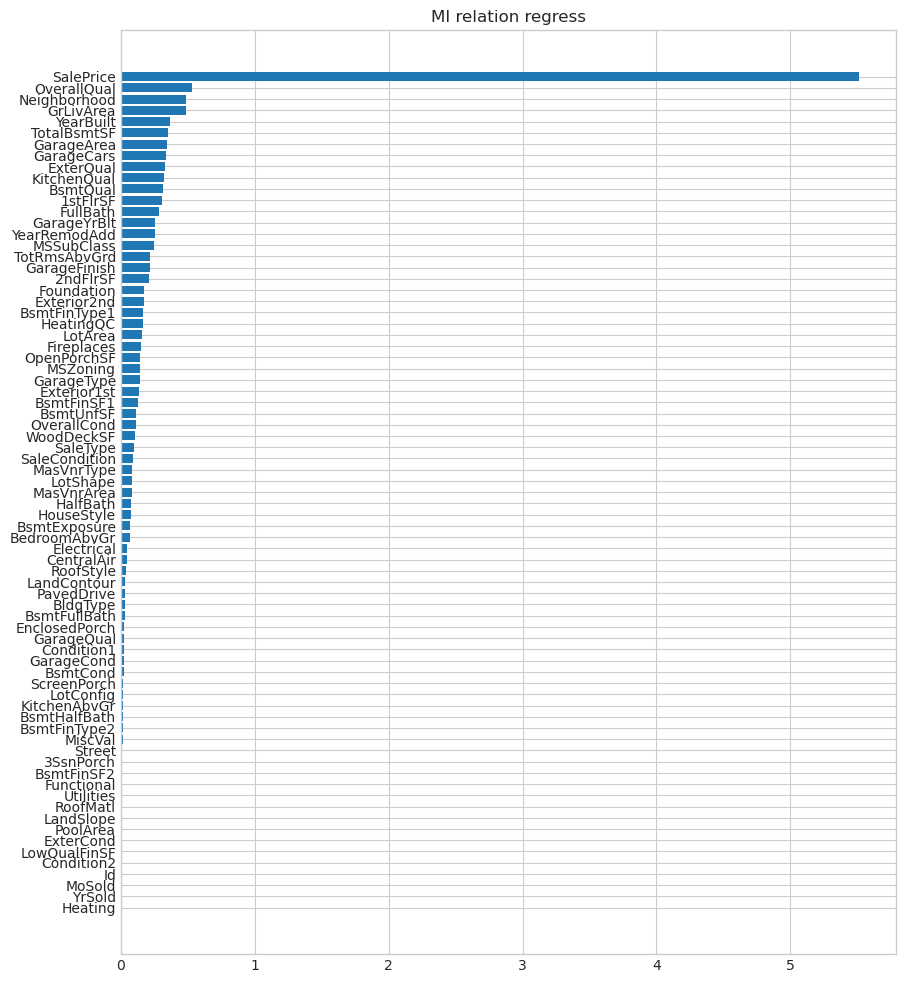

In [152]:
plt.figure(dpi=100, figsize=(10, 12))
plot_mi(binfo_df, 'MI', 'Features', "MI relation regress")

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


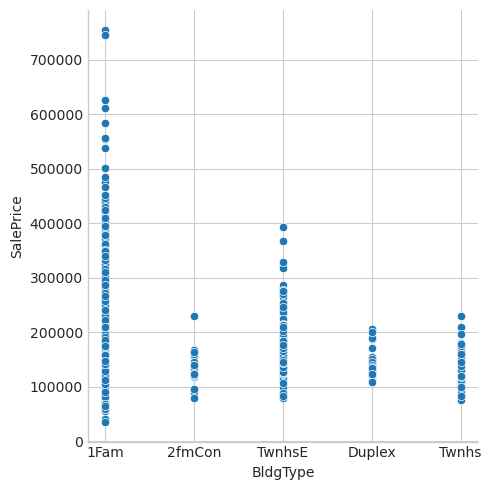

In [153]:
sns.relplot(x='BldgType', y='SalePrice', data=df_train_filt);

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


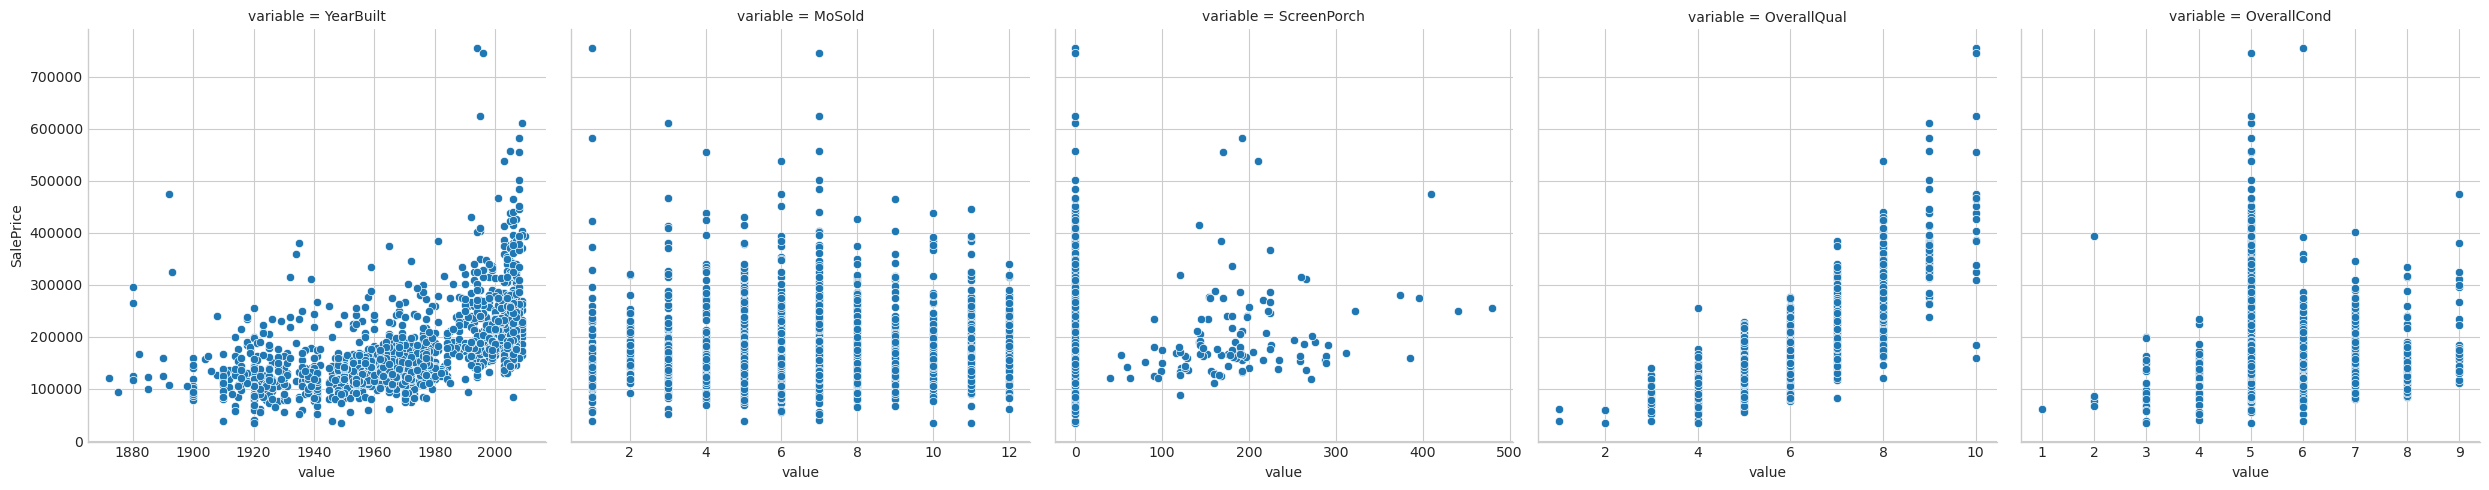

In [154]:
features = ["YearBuilt", "MoSold", "ScreenPorch", "OverallQual", "OverallCond"]
sns.relplot(
    x="value", y="SalePrice", col="variable", data=df_train.melt(id_vars="SalePrice", value_vars=features), facet_kws=dict(sharex=False),
);

In [155]:
from sklearn.preprocessing import LabelEncoder

def corre_heatmap(df):
    encoder = LabelEncoder()
    
    df_category = df.select_dtypes(include=['object']).columns
    
    
    
    for column in df_category:
        df[column] = encoder.fit_transform(df[column])
    
    correlation_matrix = df.corr()
    plt.figure(figsize=(20, 16))
    sns.heatmap(correlation_matrix, annot=False, cmap='RdBu', vmin=-1, vmax=1, linewidths=0.5)
    plt.show()

In [156]:
pd.set_option("display.max_columns", None)

X.shape

(1338, 75)

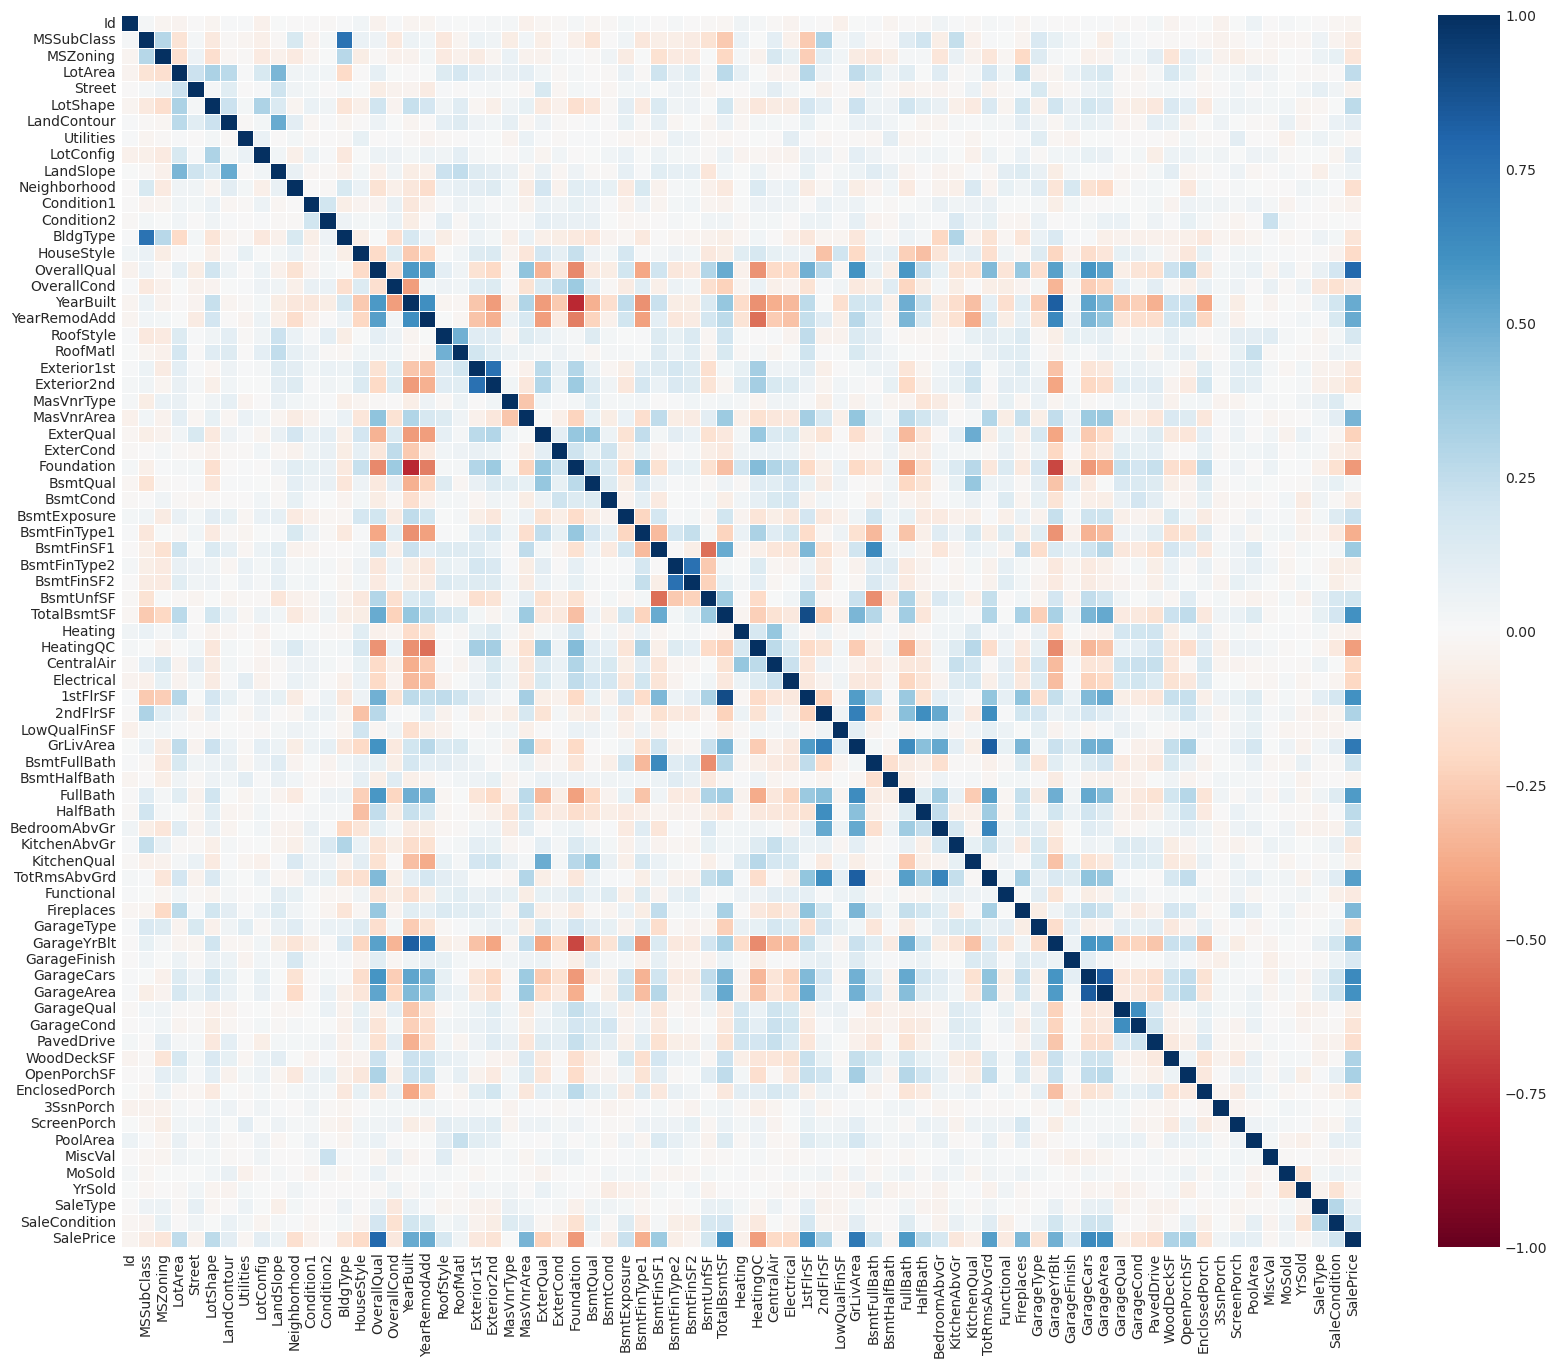

In [158]:
corre_heatmap(X)

# Test set

In [159]:
test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
df_test = pd.DataFrame(test)

nan_counts = df_test.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [160]:

df_test_filt = df_test.dropna(axis=1)

In [161]:
nan_counts = df_test_filt.isna().sum()


pd.set_option('display.max_rows', None) 
# Display NaN counts in each column
print(nan_counts)
pd.set_option('display.max_rows', 6) 

Id               0
MSSubClass       0
LotArea          0
Street           0
LotShape         0
LandContour      0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
ExterQual        0
ExterCond        0
Foundation       0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleCondition    0
dtype: int64


In [162]:
if df_train_selected_test.columns.equals(df_train_selected.columns):
    print("Both DataFrames have the same columns.")
else:
    print("The columns in the two DataFrames are different.")

NameError: name 'df_train_selected_test' is not defined

# Feature selection 

# df_train

Train a RandomForestReg and NeuralNet with...

Original feature selections.

Selected features.



## Removed features
'Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition'

In [163]:
def df_selected(df, filt):
    for i in filt:
        if i in df.columns:
            df = df.drop(i, axis=1)
        else:
            continue
    return df

In [164]:
exclude = ['Id',
     'Street',
     'Utilities',
     'Condition1',
     'Condition2',
     'HouseStyle',
     'BsmtFinSF2',
     'LowQualFinSF',
     'BsmtHalfBath',
     'Functional',
     'EnclosedPorch',
     '3SsnPorch',
     'ScreenPorch',
     'PoolArea',
     'YrSold',
     'MiscVal',
     'MoSold',
     'SaleType',
     'SaleType',
     'SaleCondition',
     'MSZoning',
     'LotArea',
     'LotShape',
     'LandContour',
     'LotConfig',
     'LandSlope',
     'Neighborhood',
     'RoofStyle',
     'RoofMatl',
     'Exterior1st',
     'Exterior2nd',
     'Heating',
     'BldgType']

In [165]:
df_train_selected = df_selected(df_train_filt, exclude)

In [166]:
pd.set_option('display.max_columns', None) 
df_train_selected

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,SalePrice
0,60,7,5,2003,2003,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,150,856,Ex,Y,SBrkr,856,854,1710,1,2,1,3,1,Gd,8,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,208500
1,20,6,8,1976,1976,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,284,1262,Ex,Y,SBrkr,1262,0,1262,0,2,0,3,1,TA,6,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,181500
2,60,7,5,2001,2002,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,434,920,Ex,Y,SBrkr,920,866,1786,1,2,1,3,1,Gd,6,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,70,7,9,1941,2006,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,877,1152,Ex,Y,SBrkr,1188,1152,2340,0,2,0,4,1,Gd,9,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,266500
1458,20,5,6,1950,1996,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,0,1078,Gd,Y,FuseA,1078,0,1078,1,1,0,2,1,Gd,5,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,142125
1459,20,5,6,1965,1965,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,136,1256,Gd,Y,SBrkr,1256,0,1256,1,1,1,3,1,TA,6,0,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,147500


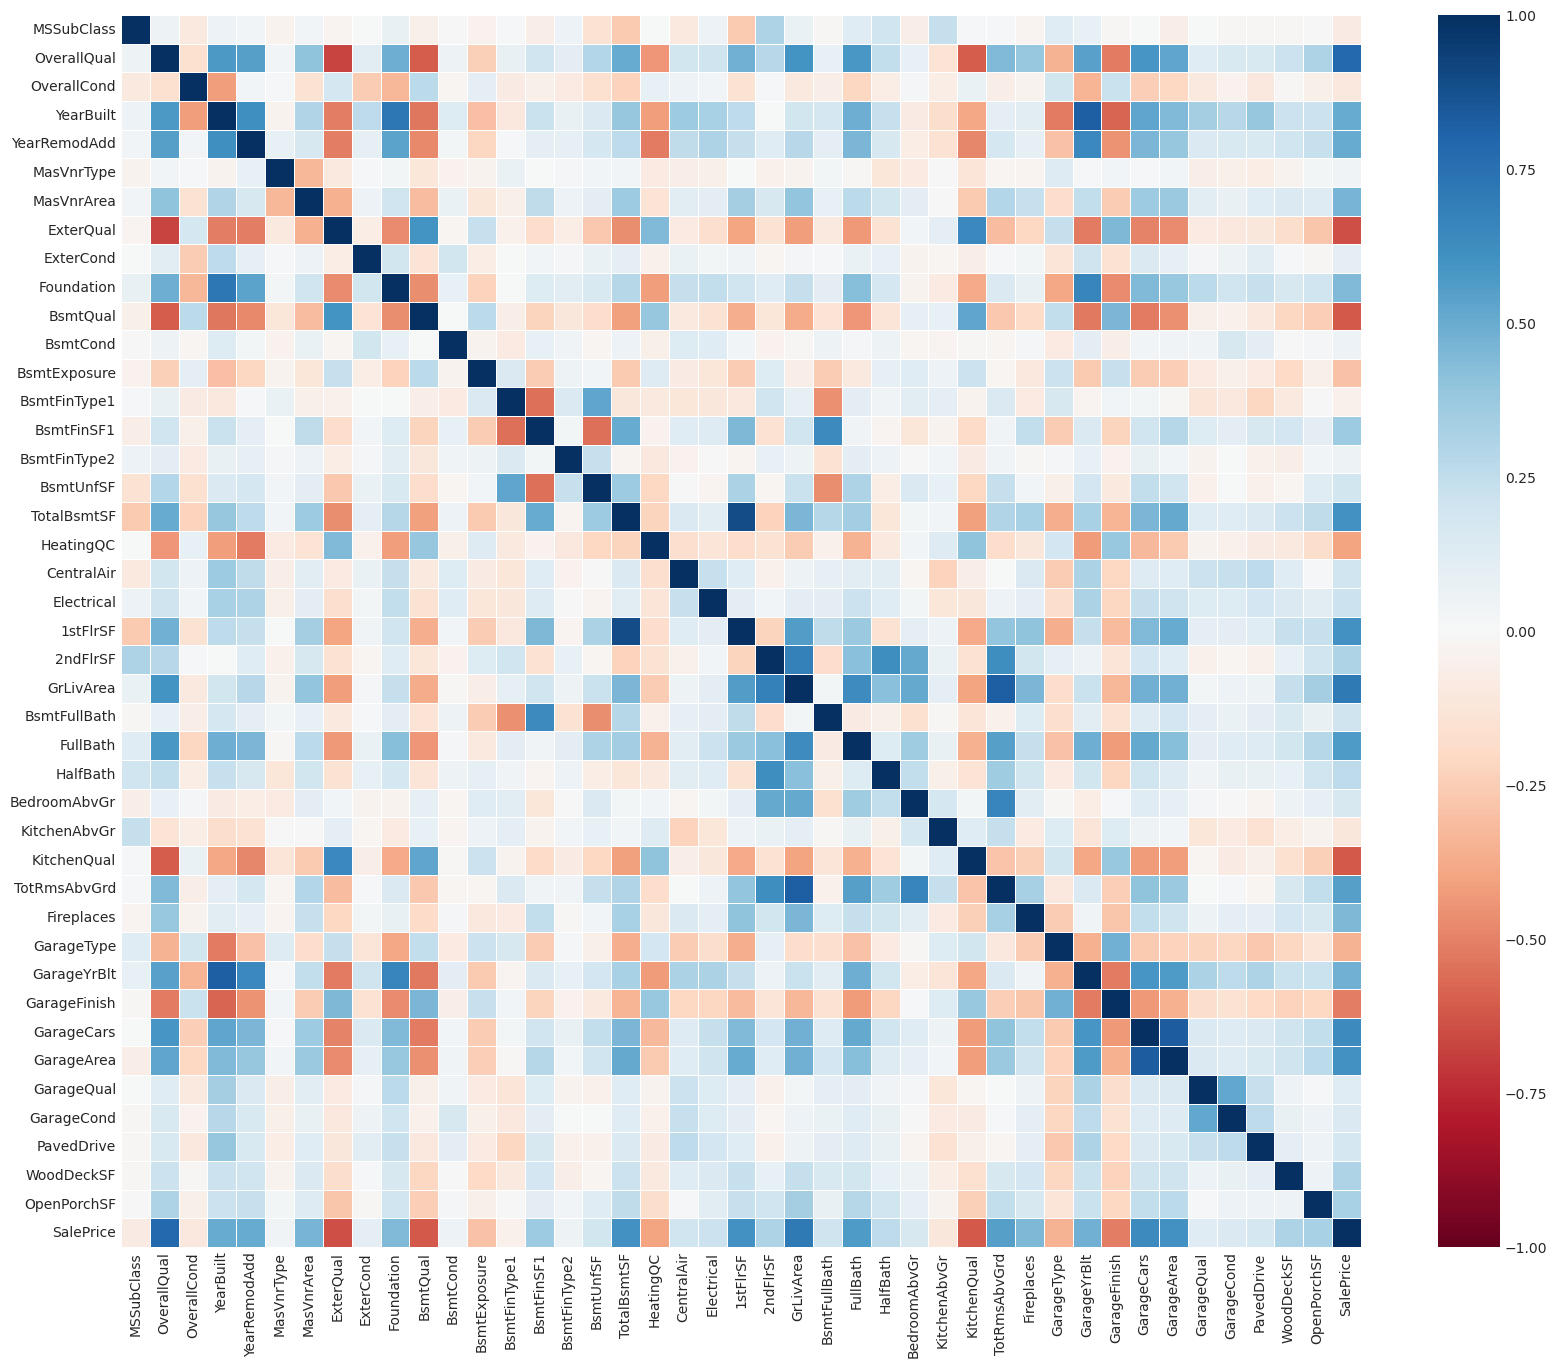

In [167]:
corre_heatmap(df_train_selected)

In [168]:
df_test_selected = df_selected(df_test_filt, exclude)
df_test_selected

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,Foundation,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,PavedDrive,WoodDeckSF,OpenPorchSF
0,20,5,6,1961,1961,TA,TA,CBlock,TA,Y,SBrkr,896,0,896,1,0,2,1,5,0,Y,140,0
1,20,6,6,1958,1958,TA,TA,CBlock,TA,Y,SBrkr,1329,0,1329,1,1,3,1,6,0,Y,393,36
2,60,5,5,1997,1998,TA,TA,PConc,Gd,Y,SBrkr,928,701,1629,2,1,3,1,6,1,Y,212,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,20,5,7,1960,1996,TA,TA,CBlock,Ex,Y,SBrkr,1224,0,1224,1,0,4,1,7,1,Y,474,0
1457,85,5,5,1992,1992,TA,TA,PConc,TA,Y,SBrkr,970,0,970,1,0,3,1,6,0,Y,80,32
1458,60,7,5,1993,1994,TA,TA,PConc,Ex,Y,SBrkr,996,1004,2000,2,1,3,1,9,1,Y,190,48


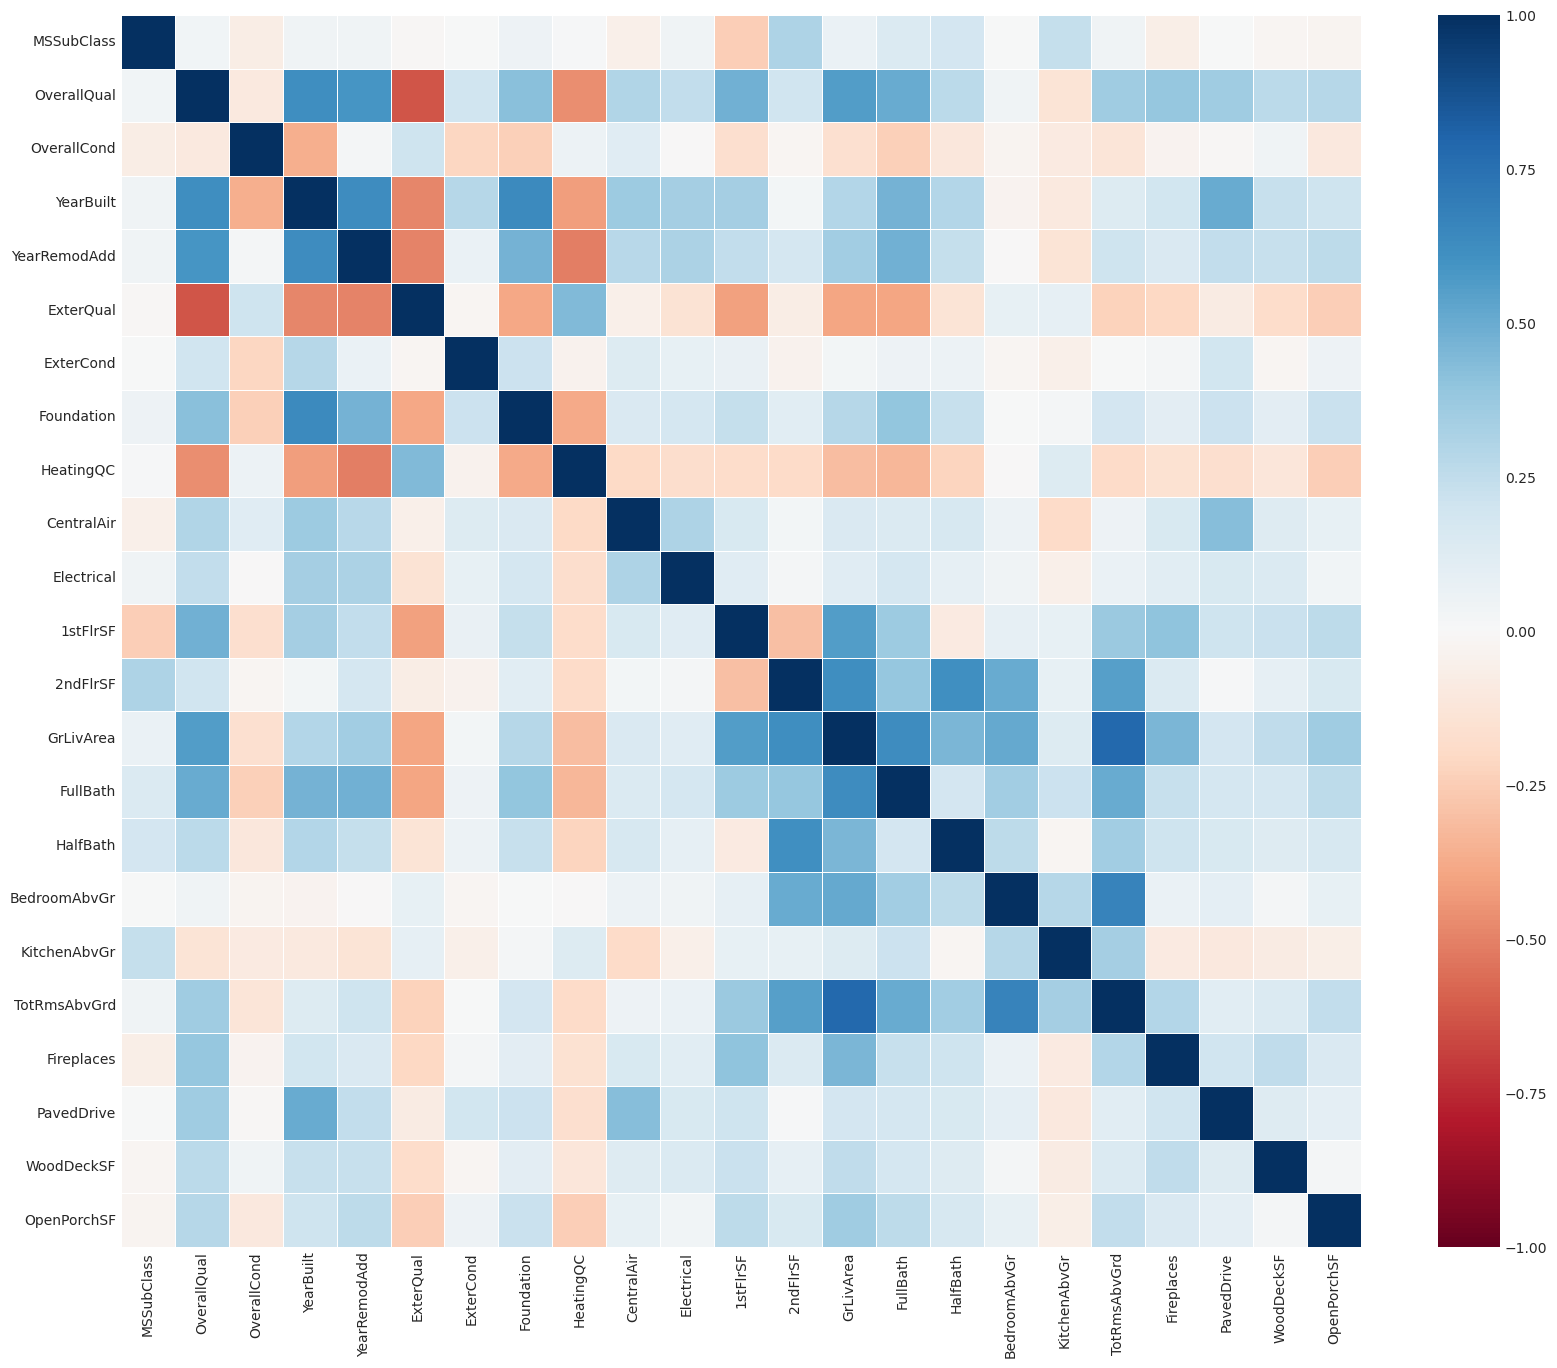

In [169]:
corre_heatmap(df_test_selected)

In [170]:
columns_only_in_df_train_selected = df_train_selected.columns.difference(df_test_selected.columns)
print("Columns only in df_train_selected:")
print(columns_only_in_df_train_selected)

# Find the columns that are in df2 but not in df1
columns_only_in_df_test_selected = df_test_selected.columns.difference(df_train_selected.columns)
print("\nColumns only in df_test_selected:")
print(columns_only_in_df_test_selected)

# Compare the common columns for differences
common_columns = df_train_selected.columns.intersection(df_test_selected.columns)

Columns only in df_train_selected:
Index(['BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtFullBath', 'BsmtQual', 'BsmtUnfSF', 'GarageArea',
       'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType',
       'GarageYrBlt', 'KitchenQual', 'MasVnrArea', 'MasVnrType', 'SalePrice',
       'TotalBsmtSF'],
      dtype='object')

Columns only in df_test_selected:
Index([], dtype='object')


In [171]:
df_train_filt

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125
1459,1460,20,RL,9937,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,5,6,1965,1965,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,CBlock,TA,TA,No,BLQ,830,LwQ,290,136,1256,GasA,Gd,Y,SBrkr,1256,0,0,1256,1,0,1,1,3,1,TA,6,Typ,0,Attchd,1965.0,Fin,1,276,TA,TA,Y,736,68,0,0,0,0,0,6,2008,WD,Normal,147500


In [43]:
df_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


In [176]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


train_y = X.pop("SalePrice")

X_tra, y_tra, X_tes, y_tes = train_test_split(df_train_selected, train_y, test_size=0.2, random_state=24)


'''
X_train = df_train_selected.drop(['SalePrice'], axis=1)
y_train = df_train_selected['SalePrice']


X_test = df_test_selected.drop(['SalePrice'], axis=1)
y_test = df_test_selected['SalePrice']
'''

"\nX_train = df_train_selected.drop(['SalePrice'], axis=1)\ny_train = df_train_selected['SalePrice']\n\n\nX_test = df_test_selected.drop(['SalePrice'], axis=1)\ny_test = df_test_selected['SalePrice']\n"

In [178]:
df_train_selected

,MSSubClass,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF
0,60,7,5,2003,2003,1,196.0,2,3,2,2,3,3,2,706,5,150,856,0,1,4,856,854,1710,1,2,1,3,1,2,8,0,1,2003.0,1,2,548,4,4,2,0,61
1,20,6,8,1976,1976,2,0.0,3,3,1,2,3,1,0,978,5,284,1262,0,1,4,1262,0,1262,0,2,0,3,1,3,6,1,1,1976.0,1,2,460,4,4,2,298,0
2,60,7,5,2001,2002,1,162.0,2,3,2,2,3,2,2,486,5,434,920,0,1,4,920,866,1786,1,2,1,3,1,2,6,1,1,2001.0,1,2,608,4,4,2,0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1457,70,7,9,1941,2006,2,0.0,0,2,3,3,1,3,2,275,5,877,1152,0,1,4,1188,1152,2340,0,2,0,4,1,2,9,2,1,1941.0,1,1,252,4,4,2,0,60
1458,20,5,6,1950,1996,2,0.0,3,3,1,3,3,2,2,49,4,0,1078,2,1,0,1078,0,1078,1,1,0,2,1,2,5,0,1,1950.0,2,1,240,4,4,2,366,0
1459,20,5,6,1965,1965,2,0.0,2,3,1,3,3,3,1,830,3,136,1256,2,1,4,1256,0,1256,1,1,1,3,1,3,6,0,1,1965.0,0,1,276,4,4,2,736,68


In [177]:
train_y

0       208500
1       181500
2       223500
         ...  
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1338, dtype: int64

In [ ]:
y_train.nunique()

In [ ]:
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train_scaled = scaler_X.fit_transform(X_train)
X_test_scaled = scaler_X.transform(X_test)
y_train_scaled = scaler_y.fit_transform(y_train)
y_test_scaled = scaler_y.transform(y_test)